<a href="https://colab.research.google.com/github/Yan-Erin/ML-AI-MiniProjects/blob/main/Lab3_MIT_Reactor_Control.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Setup Google Drive
import os
from google.colab import drive
drive.mount('/content/gdrive')
os.listdir('/content/gdrive/MyDrive')
#Basic packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2  #for plotting the MIT reactor core
#Sklearn tools
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler
#Keras specials
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam
from keras.callbacks import ReduceLROnPlateau
#External path
mitr_path='/content/gdrive/MyDrive/course_data/mitr_temp.png'


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
#Exercise 1
'''
a) There is 196 inputs/features and 3 outputs
b) The network depth is 5 because it has 5 hidden layers
c) each neuron in each layer connects to all neurons in next layer

'''

'\na) There is 196 inputs/features and 3 outputs\nb) The network depth is 5 because it has 5 hidden layers\nc) each neuron in each layer connects to all neurons in next layer\n\n'

(1000, 6) (1000, 22)
Epoch 1/100
48/48 [==============================] - 2s 12ms/step - loss: 0.3977 - mean_absolute_error: 0.3977 - val_loss: 0.1774 - val_mean_absolute_error: 0.1774
Epoch 2/100
48/48 [==============================] - 0s 4ms/step - loss: 0.1826 - mean_absolute_error: 0.1826 - val_loss: 0.1717 - val_mean_absolute_error: 0.1717
Epoch 3/100
48/48 [==============================] - 0s 4ms/step - loss: 0.1749 - mean_absolute_error: 0.1749 - val_loss: 0.1689 - val_mean_absolute_error: 0.1689
Epoch 4/100
48/48 [==============================] - 0s 4ms/step - loss: 0.1699 - mean_absolute_error: 0.1699 - val_loss: 0.1595 - val_mean_absolute_error: 0.1595
Epoch 5/100
48/48 [==============================] - 0s 4ms/step - loss: 0.1526 - mean_absolute_error: 0.1526 - val_loss: 0.1117 - val_mean_absolute_error: 0.1117
Epoch 6/100
48/48 [==============================] - 0s 4ms/step - loss: 0.1175 - mean_absolute_error: 0.1175 - val_loss: 0.0913 - val_mean_absolute_error: 0.0913


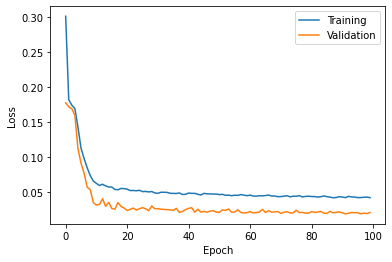

In [ ]:
#Exercise 2
xurl='https://raw.githubusercontent.com/MajdiRadaideh/S097data/main/crx.csv'
yurl='https://raw.githubusercontent.com/MajdiRadaideh/S097data/main/powery.csv'
xdata=pd.read_csv(xurl)
ydata =pd.read_csv(yurl)
print(xdata.shape, ydata.shape)
xdata= xdata.to_numpy()
ydata=ydata.to_numpy()

#set training data
xtrain= xdata[:901]
ytrain=ydata[0:901]

#Set testing data
xtest= xdata[901:]
ytest= ydata[901:]

#Input output scaling
xscaler = MinMaxScaler()
yscaler = MinMaxScaler()
Xtrain = xscaler.fit_transform(xtrain)
Xtest = xscaler.transform(xtest)
Ytrain = yscaler.fit_transform(ytrain)
Ytest = yscaler.transform(ytest)

#Making the NN
model = Sequential()
#layer1
model.add(Dense(100, activation = "relu", kernel_initializer = 'normal'))
model.add(Dropout(0.5))
#layer2
model.add(Dense(200, activation = "relu", kernel_initializer = 'normal'))

#layer3
model.add(Dense(200, activation = "relu", kernel_initializer = 'normal'))

#layer4
model.add(Dense(200, activation = "relu", kernel_initializer = 'normal'))

#layer5
model.add(Dense(200, activation = "relu", kernel_initializer = 'normal'))


#layer8
model.add(Dense(ytrain.shape[1], activation = "linear", kernel_initializer = 'normal'))

model.compile(loss='mean_absolute_error', optimizer=Adam(learning_rate=4.2e-4), metrics=['mean_absolute_error'])


redlr= ReduceLROnPlateau(monitor='val_mean_absolute_error', factor=0.9, patience=5, verbose=1, min_lr = 0)
history=model.fit(Xtrain, Ytrain, epochs=100, batch_size=16, validation_split = 0.15, callbacks=redlr, verbose=True)
model.summary()

train_err=history.history['mean_absolute_error']
val_err=history.history['val_mean_absolute_error']

# plot the training/validation MAE on the same plot
plt.figure()
plt.plot(train_err, label='Training')
plt.plot(val_err, label='Validation')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
Ynn = model.predict(Xtest)
Ynn=yscaler.inverse_transform(Ynn)
Ytest=yscaler.inverse_transform(Ytest)
print("MAE: ", mean_absolute_error(Ynn,Ytest), "r^2: ", r2_score(Ynn,Ytest))